2024-05-30 11:43:02.995796: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/paulgaudin/Desktop/figure_average_scoping/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


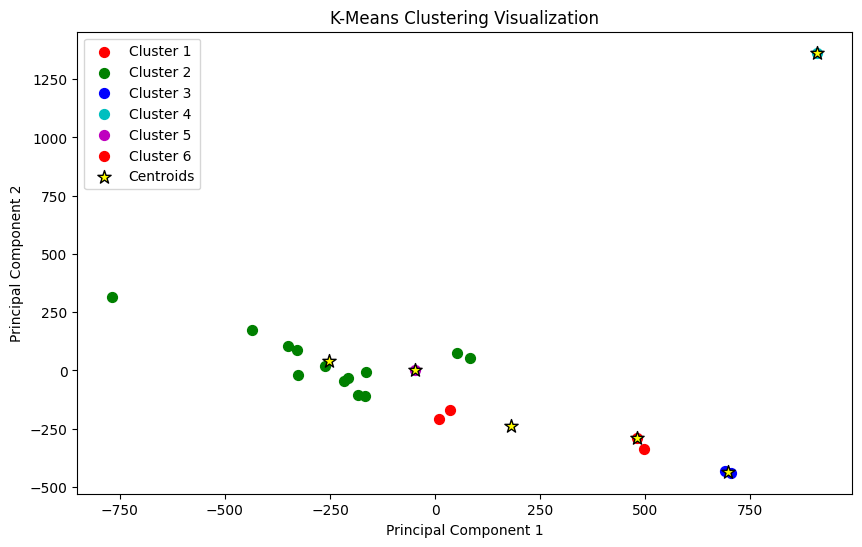

In [1]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

def load_and_preprocess_images(directory, target_size=(224, 224)):
    image_paths = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
    images = [load_img(path, target_size=target_size) for path in image_paths]
    images_array = np.array([img_to_array(image) for image in images])
    images_array = preprocess_input(images_array)
    return images, images_array, image_paths

def extract_features(images_array):
    model = VGG16(weights='imagenet', include_top=False)
    features = model.predict(images_array)
    features_flattened = features.reshape(features.shape[0], -1)
    return features_flattened

def reduce_dimensions(features, n_components=6):
    pca = PCA(n_components=n_components)
    reduced_features = pca.fit_transform(features)
    return reduced_features, pca

def perform_kmeans(reduced_features, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(reduced_features)
    return labels, kmeans, reduced_features

def create_cluster_directories(base_dir, n_clusters):
    for i in range(1, n_clusters + 1):
        path = os.path.join(base_dir, f'cluster_{i}')
        if not os.path.exists(path):
            os.makedirs(path)

def save_images_to_clusters(image_paths, labels, base_dir, n_clusters):
    for path, label in zip(image_paths, labels):
        directory = os.path.join(base_dir, f'cluster_{label+1}')
        shutil.copy(path, directory)

def visualize_clusters(reduced_features, labels, cluster_centers):
    plt.figure(figsize=(10, 6))
    colors = ['r', 'g', 'b', 'c', 'm'] * (len(cluster_centers) // 5 + 1)  # Extend color list as needed
    for i in range(cluster_centers.shape[0]):
        plt.scatter(reduced_features[labels == i, 0], reduced_features[labels == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=100, c='yellow', marker='*', edgecolors='black', label='Centroids')
    plt.title('K-Means Clustering Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

n_clusters = 6  # Set the number of clusters here

# Specify the directory you want to search
directory = '../example_images_2'

# Load and preprocess images
images, images_array, image_paths = load_and_preprocess_images(directory)

# Extract features
features_flattened = extract_features(images_array)

# Reduce dimensions
reduced_features, pca = reduce_dimensions(features_flattened)

# Perform KMeans clustering
labels, kmeans, reduced_features = perform_kmeans(reduced_features, n_clusters)

# Create directories for clusters
base_dir = '../example_images_sorted'
create_cluster_directories(base_dir, n_clusters)

# Save images to their respective cluster directories
save_images_to_clusters(image_paths, labels, base_dir, n_clusters)

# Visualize K-Means Clusters
visualize_clusters(reduced_features, labels, kmeans.cluster_centers_)


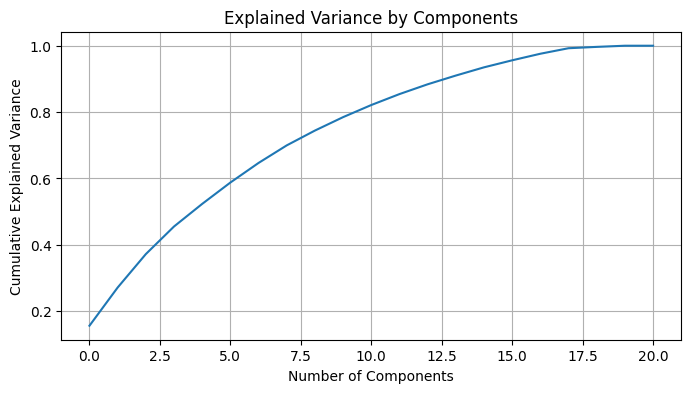

In [2]:
# Looking at explained variance - use to inform Number of Components
pca = PCA().fit(features_flattened)

# Plotting the cumulative variance
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


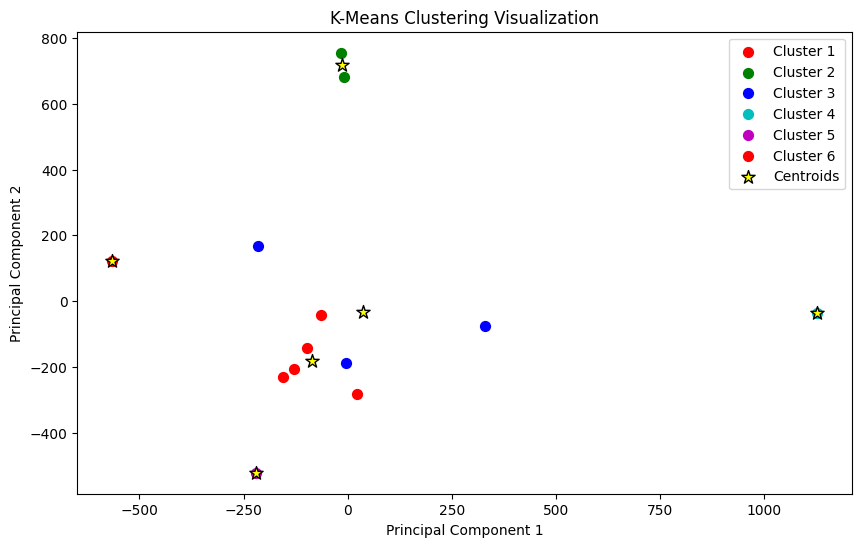

In [4]:
n_clusters = 6

# Specify the directory you want to search
directory = '../example_images_sorted/cluster_2'

# Load and preprocess images
images, images_array, image_paths = load_and_preprocess_images(directory)

# Extract features
features_flattened = extract_features(images_array)

# Reduce dimensions
reduced_features, pca = reduce_dimensions(features_flattened)

# Perform KMeans clustering
labels, kmeans, reduced_features = perform_kmeans(reduced_features, n_clusters)

# Create directories for clusters
base_dir = '../cluster_2_example_images_sorted'
create_cluster_directories(base_dir, n_clusters)

# Save images to their respective cluster directories
save_images_to_clusters(image_paths, labels, base_dir, n_clusters)

# Visualize K-Means Clusters
visualize_clusters(reduced_features, labels, kmeans.cluster_centers_)